In [52]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Import the Preset class
from presets import Preset


# To use presets, we'll make a dummy import of librosa
# and the display submodule here.
import librosa as _librosa
import librosa.display as _display
# The assignment here is to circumvent python's inability
# to rename submodule imports within the package
_librosa.display = _display



In [53]:
# First, we need to set up the preset-wrapped librosa import

librosa = Preset(_librosa)

# To change the default sampling rate, we can set the `sr` entry:
librosa['sr'] = 44100

# and similarly for hop_length and n_fft
librosa['hop_length'] = 1024
librosa['n_fft'] = 4096

# In general, when you set `librosa['X']` for any string `X`, anywhere within
# librosa where the parameter `X` occurs as a keyword-argument,
# its default value will be replaced by whatever value you provide.

In [54]:
filename = 'Audios/Heart_Attack.mp3'
y, sr = librosa.load(filename, duration=5, offset=35)
save_path = 'Spectrograms/Heart_Attack.jpg'

In [55]:
#pylab to save file
import pylab
# Generate a Mel spectrogram:

M = librosa.feature.melspectrogram(y=y)

# Of course, you can still override the new default manually, e.g.:

M_highres = librosa.feature.melspectrogram(y=y)


In [56]:
# And plot the results
plt.figure(figsize=(6, 6))

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

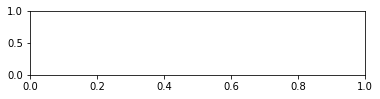

In [57]:
ax = plt.subplot(3, 1, 1)


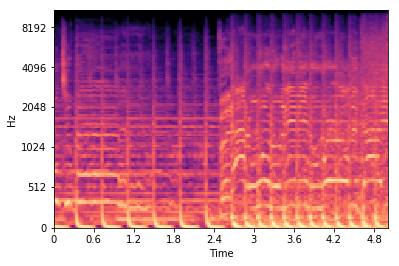

In [58]:
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time')

In [59]:
print(y, sr)

[ 0.35559082  0.31378174  0.27496338 ...  0.08799744  0.0166626
 -0.09179688] 44100


In [60]:
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)

<Figure size 432x288 with 0 Axes>

In [61]:
#plt.title('44100/1024/4096')

In [62]:
#plt.subplot(3, 1, 2, sharex=ax, sharey=ax)

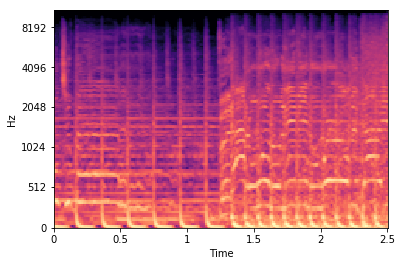

In [63]:
librosa.display.specshow(librosa.power_to_db(M_highres, ref=np.max),
                         hop_length=512,
                         y_axis='mel', x_axis='time')

Text(0.5,1,'44100/512/4096')

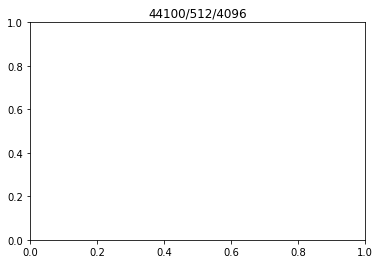

In [64]:
plt.title('44100/512/4096')


In [65]:
# We can repeat the whole process with different defaults, just by
# updating the parameter entries
librosa['sr'] = 11025

In [66]:
y2, sr2 = librosa.load(filename, duration=5, offset=35)

In [67]:
M2 = librosa.feature.melspectrogram(y=y2, sr=sr2)

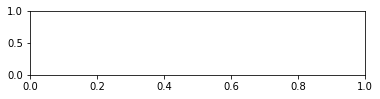

In [70]:
plt.subplot(3, 1, 3, sharex=ax, sharey=ax)

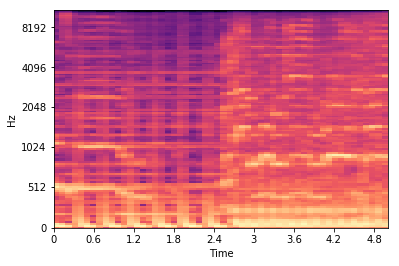

In [71]:
librosa.display.specshow(librosa.power_to_db(M2, ref=np.max),
                         y_axis='mel', x_axis='time')

Text(0.5,1,'11025/1024/4096')

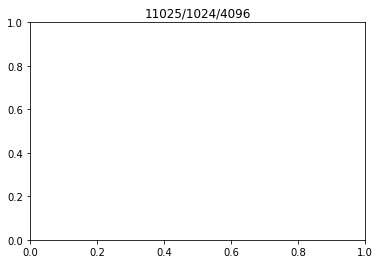

In [72]:
plt.title('11025/1024/4096')

In [73]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>